## Maximum Sharpe Rate Portfolio (MSR)
    No specific risk
    Maximize the reward per unit of risk 

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

import pandas as pd
import risk_kit as rk
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
ind = rk.get_ind_returns()
er = rk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [17]:
from scipy.optimize import minimize

def portfolio_return(weights, rets):
    return weights.T @ rets

def portfolio_volatility(weights, covmat):
    return (weights.T @ covmat @ weights) ** 0.5

def msr(risk_free_rate, er, cov):
    n_assets = er.shape[0]
    init_guess = np.repeat(1/n_assets, n_assets)
    bounds = ((0.0, 1.0),) * n_assets

    full_allocated = {
        "type": "eq",
        "fun": lambda weights: np.sum(weights) - 1
    }
    
    def negative_sharpe(weights, risk_free_rate, er, cov):
        r = portfolio_return(weights, er)
        vol = portfolio_volatility(weights, cov)
        return -(r - risk_free_rate)/vol
    
    results = minimize(negative_sharpe, init_guess, # minimize negative_shp --> maximize shp
                  args=(risk_free_rate, er, cov, ), method="SLSQP",
                  options={"disp": False},
                  constraints=(full_allocated),
                  bounds=bounds)
    return results.x


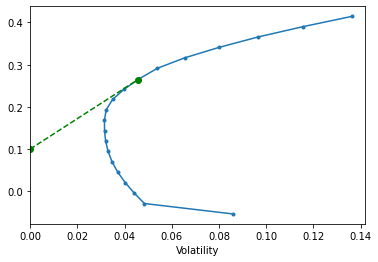

In [19]:
# efficient frontier
ax = rk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
risk_free_rate = 0.1
weights_msr = msr(risk_free_rate, er, cov)
rets_msr = portfolio_return(weights_msr, er)
vol_msr = portfolio_volatility(weights_msr, cov)

# CAPITAL MARKET LINE
cml_x = [0, vol_msr]
cml_y = [risk_free_rate, rets_msr]
ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")